<a href="https://www.kaggle.com/code/blessingumoru/pgs3e11-ensemble-feature-eng?scriptVersionId=124480359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e11/sample_submission.csv
/kaggle/input/playground-series-s3e11/train.csv
/kaggle/input/playground-series-s3e11/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')

In [4]:
train_data.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [5]:
train_data['recyclable_package'].unique()

array([1., 0.])

In [6]:
test_data.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240224 non-null  int64  
 1   store_sales(in millions)    240224 non-null  float64
 2   unit_sales(in millions)     240224 non-null  float64
 3   total_children              240224 non-null  float64
 4   num_children_at_home        240224 non-null  float64
 5   avg_cars_at home(approx).1  240224 non-null  float64
 6   gross_weight                240224 non-null  float64
 7   recyclable_package          240224 non-null  float64
 8   low_fat                     240224 non-null  float64
 9   units_per_case              240224 non-null  float64
 10  store_sqft                  240224 non-null  float64
 11  coffee_bar                  240224 non-null  float64
 12  video_store                 240224 non-null  float64
 13  salad_bar     

**----> Checking for missing Values**

In [9]:
train_data.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [10]:
test_data.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

**----> Remove Duplicates**

In [11]:
duplicated = train_data.duplicated(keep='first')
removed_dup = train_data[~duplicated]


 **EDA**

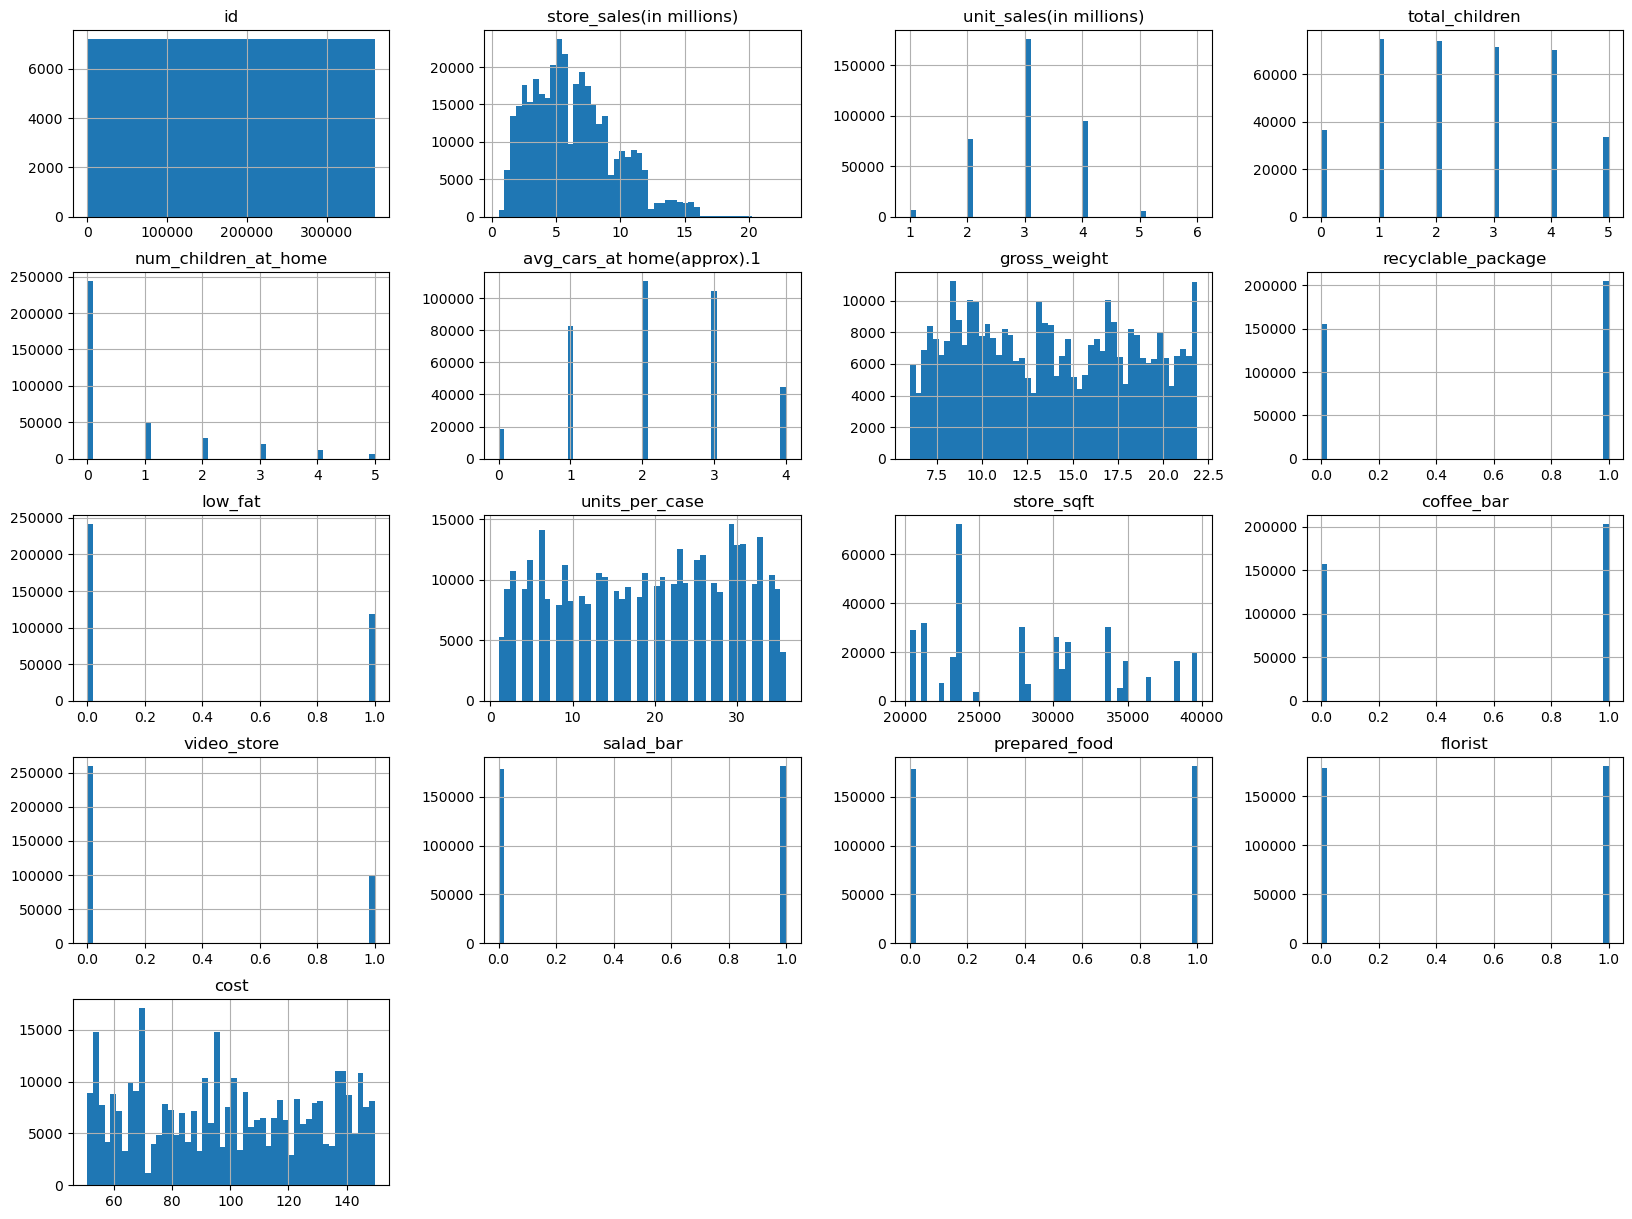

In [12]:
#plt.figure())
#p = sns.histplot(data=train_data, y="total_children")
train_data.hist(bins=50, figsize=(20,15))
#p.set(xlabel = None)
#p.set(ylabel = 'total_children')
plt.show()

<Figure size 2000x1500 with 0 Axes>

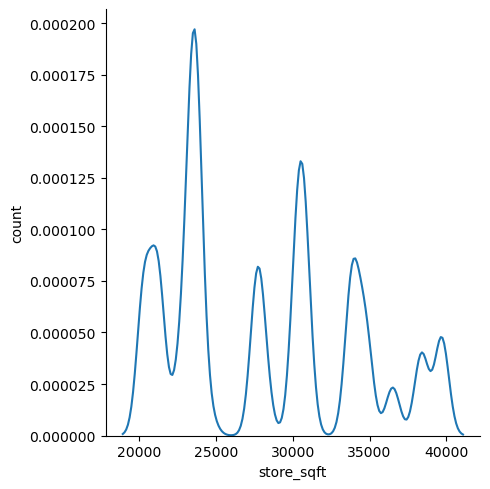

In [13]:
plt.figure(figsize=(20,15))
p = sns.displot(data=train_data, x='store_sqft', kind ='kde')
p.set(xlabel='store_sqft', ylabel='count')
plt.show()

In [14]:
train_dataset = train_data.drop('id', axis=1)
test_dataset = test_data.drop('id', axis=1)

In [15]:
train_dataset.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [16]:
test_dataset.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')

In [17]:
outcomeVariable =train_dataset.cost
inputVariable = train_dataset[['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']]
inputVariable

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0
360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0
360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0
360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0


**DataTransformation**

In [18]:
from sklearn.preprocessing import MinMaxScaler
class RescaleData(BaseEstimator, TransformerMixin):
    def __init__(self, scaler='standard'):
        self.scaler = scaler
        if scaler == 'standard':
            self.scaler_ = StandardScaler()
        elif scaler == 'minmax':
            self.scaler_ = MinMaxScaler()
        else:
            raise ValueError('Invalid scaler type specified.')
    
    def fit(self, X, y=None):
        self.scaler_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.scaler_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.scaler_.fit_transform(X)

In [19]:
from sklearn.preprocessing import Normalizer,StandardScaler

class NormalizeData(BaseEstimator, TransformerMixin):
    def __init__(self, norm='l2'):
        self.norm = norm
        self.normalizer_ = Normalizer(norm=self.norm)
    
    def fit(self, X, y=None):
        self.normalizer_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.normalizer_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.normalizer_.fit_transform(X)

**FeatureSelection**

In [20]:
from sklearn.feature_selection import SelectKBest,chi2, RFE,mutual_info_classif

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y=None):
        from sklearn.feature_selection import SelectKBest, f_regression
        self.selector = SelectKBest(f_regression, k=self.k)
        self.selector.fit(X, y)
        return self
        
    def transform(self, X):
        return self.selector.transform(X)
    
    def get_support(self, indices=False):
        return self.selector.get_support(indices=indices)

**------> Pipeline**

In [21]:
from sklearn.pipeline import Pipeline
rescale  = RescaleData(scaler='standard')
normalize = NormalizeData(norm='l2')
featureSelect = FeatureSelection(k=10)
pipeline = Pipeline(steps=[('rescale', rescale), ('normalize', normalize),('featureSelect', featureSelect)])
processedData = pipeline.fit_transform(inputVariable,outcomeVariable )
processedData.shape

(360336, 10)

**Model Building using Bagging Ensemling method Learning**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, Y_tarin, Y_test= train_test_split(processedData, outcomeVariable ,test_size=0.3,random_state=42)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
model =GradientBoostingRegressor(max_depth=2, n_estimators=250,learning_rate=0.5)
model.fit(X_train,Y_tarin)
predicted_Y= model.predict(X_test)

In [24]:
MSQE = MSE(Y_test,predicted_Y)

print(MSQE)

839.8161620374938


In [25]:
processedTestData = pipeline.transform(test_dataset)
testPredict_Y = model.predict(processedTestData)

In [26]:
output = pd.DataFrame({'id': test_data.id, 'cost': testPredict_Y})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
